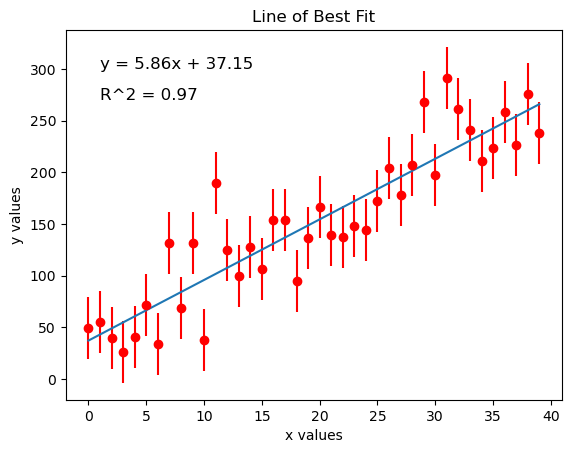

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import os
from astropy.table import Table
%matplotlib inline
#from scipy.optimize import curve_fit
from scipy import stats

#Ignoring uncertainties

specdir = '/Users/EvanB.LAPTOP-8CHCIOMA/astr503/my_repositories/Intro_Python_Project' #'/astr503/my_repositories/Intro_Python_Project/'
os.chdir(specdir)

data = Table.read('data.v3.txt',format='ascii', names=('x','y','dy'))

x = np.array(data['x'])
y = np.array(data['y'])
dy = np.array(data['dy'])

a, b = np.polyfit(x, y, 1)

#def r2(x, y):
    #slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    #return r_value**2

xx=np.linspace(0,39,40)
yy=a*xx+b

rss = sum((y-yy)**2)
#ssr = sum((x-mean_x)**2)
ssres = np.sqrt(rss/(40-2)) #+ ssr
sstot = sum(dy)
r2 = 1-(ssres/sstot)

plt.title('Line of Best Fit')
plt.xlabel('x values')
plt.ylabel('y values')
plt.errorbar(x, y, color = 'r', label = 'data', yerr=dy, fmt="o")
plt.plot(x, a*x+b)
plt.text(1, 300, 'y = ' + '{:.2f}'.format(a) + 'x' + ' + {:.2f}'.format(b), size=12)
plt.text(1, 270, 'R^2 = ' + '{:.2f}'.format(r2), size=12)
plt.show()

0.9700200965095858


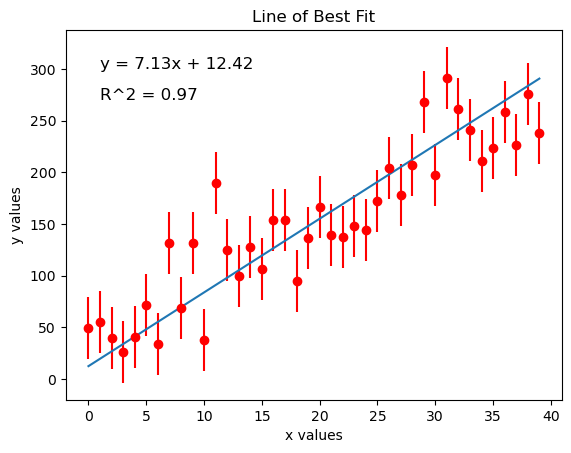

In [28]:
#Taking uncertainties into account

specdir = '/Users/EvanB.LAPTOP-8CHCIOMA/astr503/my_repositories/Intro_Python_Project' #'/astr503/my_repositories/Intro_Python_Project/'
os.chdir(specdir)

data = Table.read('data.v3.txt',format='ascii', names=('x','y','dy'))

x = np.array(data['x'])
y = np.array(data['y'])
dy = np.array(data['dy'])

mean_x = x.mean()
mean_y = y.mean()

Cov = np.cov([x-mean_x,y-mean_y])
evals, evecs = np.linalg.eig(Cov)

a = evecs[1,evals.argmax()]/evecs[0,evals.argmax()]
b = mean_y-a*mean_x

#def r2(x, y):
    #slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    #return r_value**2

xx=np.linspace(0,39,40)
yy=a*xx+b

rss = sum((y-yy)**2)
#ssr = sum((x-mean_x)**2)
ssres = np.sqrt(rss/(40-2)) #+ ssr
sstot = sum(dy)
r2 = 1-(ssres/sstot)

plt.title('Line of Best Fit')
plt.xlabel('x values')
plt.ylabel('y values')
plt.errorbar(x, y, color = 'r', label = 'data', yerr=dy, fmt="o")
plt.plot(xx, yy)
plt.text(1, 300, 'y = ' + '{:.2f}'.format(a) + 'x' + ' + {:.2f}'.format(b), size=12)
plt.text(1, 270, 'R^2 = ' + '{:.2f}'.format(r2), size=12)
plt.show()